In [3]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

In [4]:
Grid0121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_011121.csv')
Grid0221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020121.csv')
Grid0321 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030121.csv')
Grid0421 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_040121.csv')
Grid0521 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_050121.csv')
Grid0621 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_060121.csv')
Grid0721 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_070121.csv')
Grid0821 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_080121.csv')
Grid0921 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_090121.csv')
Grid1021 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_100121.csv')
Grid1121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_110121.csv')
Grid1221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_120121.csv')
Grid0122 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_010122.csv')
Grid0222 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020122.csv')

PV0121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_011121.csv')
PV0221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020121.csv')
PV0321 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030121.csv')
PV0421 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_040121.csv')
PV0521 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_050121.csv')
PV0621 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_060121.csv')
PV0721 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_070121.csv')
PV0821 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_080121.csv')
PV0921 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_090121.csv')
PV1021 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_100121.csv')
PV1121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_110121.csv')
PV1221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_120121.csv')
PV0122 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_010122.csv')
PV0222 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020122.csv')

In [5]:
Grid_raw = pd.concat([Grid0121,Grid0221,Grid0321,Grid0421,Grid0521,Grid0621,Grid0721,Grid0821,Grid0921,Grid1021,Grid1121,Grid1221,Grid0122,Grid0222])
PV_raw = pd.concat([PV0121,PV0221,PV0321,PV0421,PV0521,PV0621,PV0721,PV0821,PV0921,PV1021,PV1121,PV1221,PV0122,PV0222])

In [6]:
PV_raw.diff()['Time']

0          NaN
1        164.0
2        110.0
3        165.0
4         98.0
         ...  
24753     57.0
24754    153.0
24755     87.0
24756     76.0
24757    191.0
Name: Time, Length: 317131, dtype: float64

In [13]:
def removeLargeDiff(diff_in):
    if (diff_in > 600):
        return 0
    return diff_in

def extract_data(data_in):
    data_out = data_in.drop(['No', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'PF1', 'PF2', 'PF3', 'F'], axis=1)
    data_out['Power'] = data_out['P1'] + data_out['P2'] + data_out['P3']
    
    data_out['Timediff'] = data_out.diff()['Time']
    data_out.loc[:,'Timediff'] = data_out.Timediff.shift(-1)
    data_out = data_out.iloc[:-1,:]
    data_out['Timediff'] = data_out.Timediff.map(removeLargeDiff)
    
    data_out['Energy'] = data_out['Power'] * data_out['Timediff']
    data_out.loc[:,'Time'] = pd.to_datetime(data_out.loc[:,'Time'],unit='s')
    df = data_out.set_index(['Time'])
    data = df[['Energy']].groupby(pd.Grouper(freq='1H')).sum()
    data['Energy_kWh'] = data['Energy'] / 3600000
    return data
    #return data_out.set_index(['Time'])

In [14]:
Grid_hourly = extract_data(Grid_raw)
PV_hourly = extract_data(PV_raw)

In [15]:
Grid_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 07:00:00,-16564650.0,-4.601292
2020-12-02 08:00:00,-19928940.0,-5.535817
2020-12-02 09:00:00,-14473890.0,-4.020525
2020-12-02 10:00:00,-539820.0,-0.149950
2020-12-02 11:00:00,1556880.0,0.432467
...,...,...
2022-01-31 20:00:00,0.0,0.000000
2022-01-31 21:00:00,0.0,0.000000
2022-01-31 22:00:00,0.0,0.000000


In [16]:
PV_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,698550.0,0.194042
2020-12-02 10:00:00,1478430.0,0.410675
2020-12-02 11:00:00,1513860.0,0.420517
2020-12-02 12:00:00,1059300.0,0.294250
2020-12-02 13:00:00,652350.0,0.181208
...,...,...
2022-01-31 20:00:00,0.0,0.000000
2022-01-31 21:00:00,0.0,0.000000
2022-01-31 22:00:00,0.0,0.000000


<AxesSubplot:xlabel='Time'>

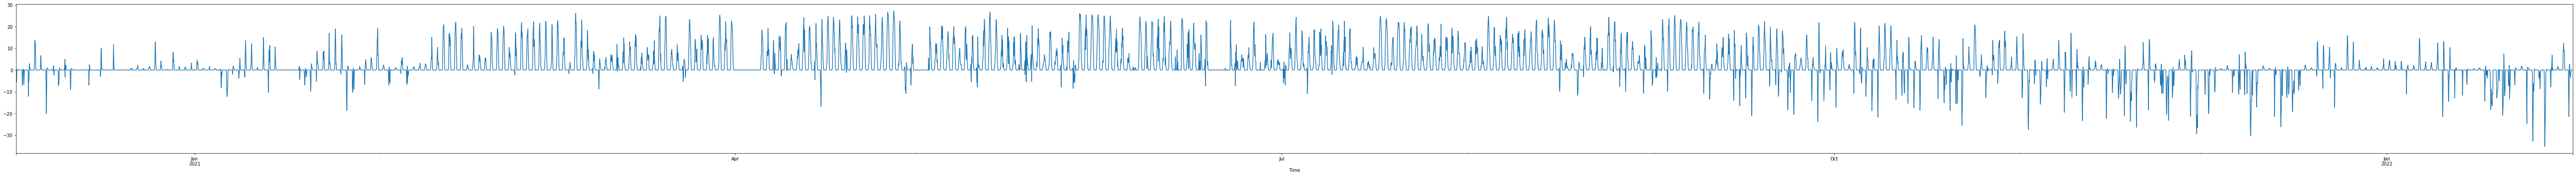

In [17]:
Grid_hourly['Energy_kWh'].plot(figsize=(100,6))

<AxesSubplot:xlabel='Time'>

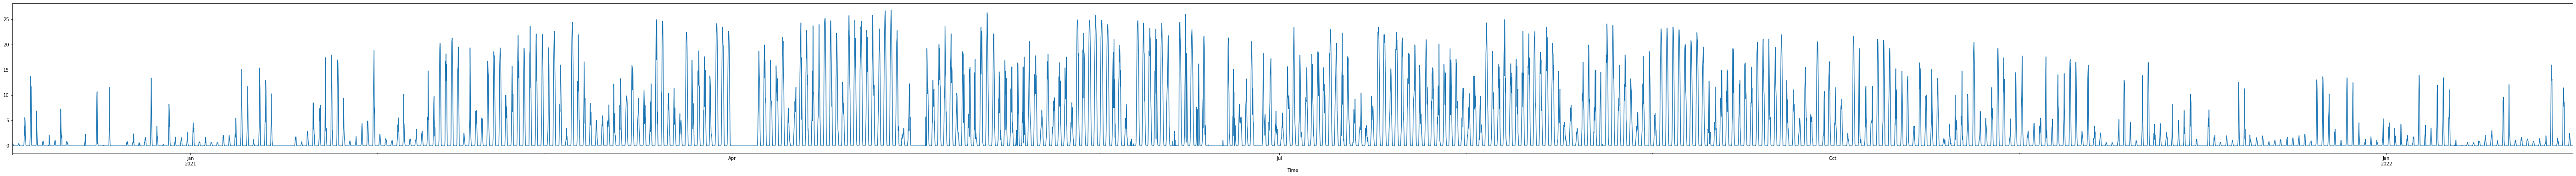

In [18]:
PV_hourly['Energy_kWh'].plot(figsize=(100,6))

# Remove faulty data from Grid and PV table

def markNaN(in_val):
    if (in_val < -30) or (in_val > 30):
        return np.NaN
    return in_val

def fixData(data_in):
    data_out = data_in
    
    data_out['Energy_kWh'] = data_in['Energy_kWh'].map(markNaN).copy()
    
    data_out = data_out.fillna(method='ffill')
    return data_out

Grid_hourly = fixData(Grid_hourly)
#PV_hourly = fixData(PV_hourly_raw)

#fig1 = Grid_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(100,6), color='r')
fig1 = Grid_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())
#fig2 = PV_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(100,6), color='k')
#fig2 = PV_hourly['Energy_kWh'].plot(figsize=(100,6), color='k')
#fig2.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

# EV charging data

In [52]:
Charge_hourly = PV_hourly[['Energy_kWh']].copy()
Charge_hourly['Energy_kWh'] = PV_hourly['Energy_kWh'] - Grid_hourly.iloc[2:]['Energy_kWh']

def markNaN(in_val):
    if (in_val < -10) or (in_val > 30):
        return np.NaN
    return in_val

def fixData(data_in):
    data_out = data_in
    
    data_out['Energy_kWh'] = data_in['Energy_kWh'].map(markNaN).copy()
    
    data_out = data_out.fillna(method='ffill')
    return data_out

Charge_hourly = fixData(Charge_hourly_raw)

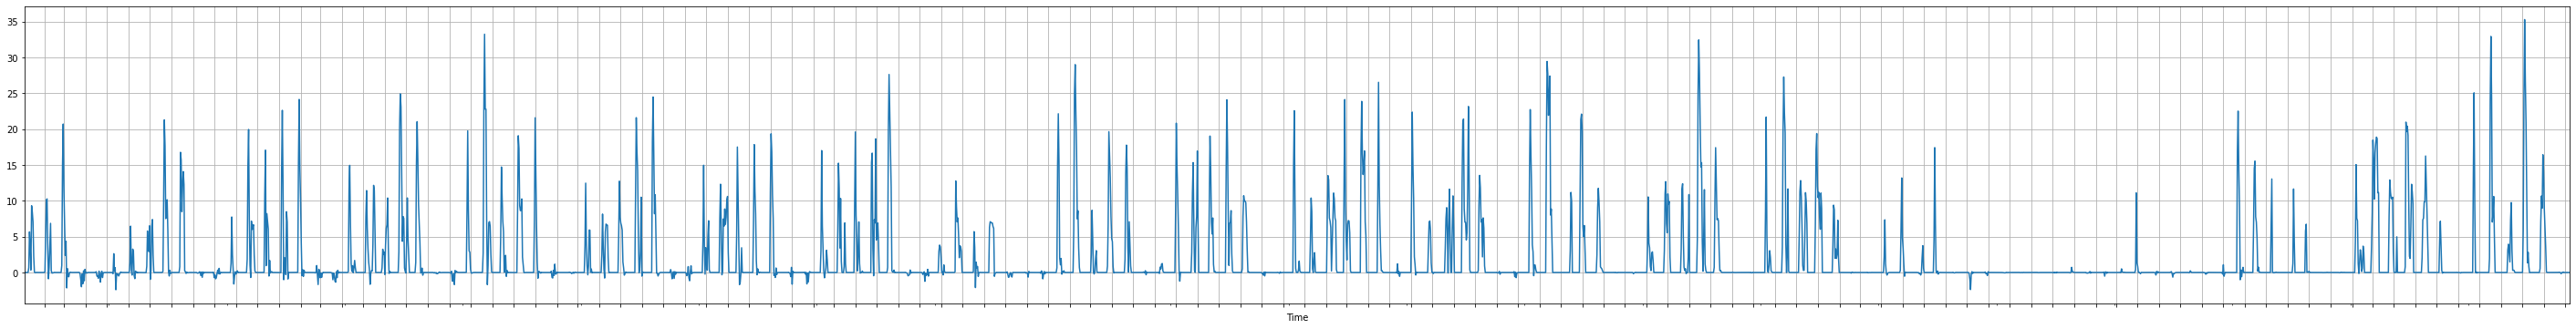

In [53]:
fig = Charge_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

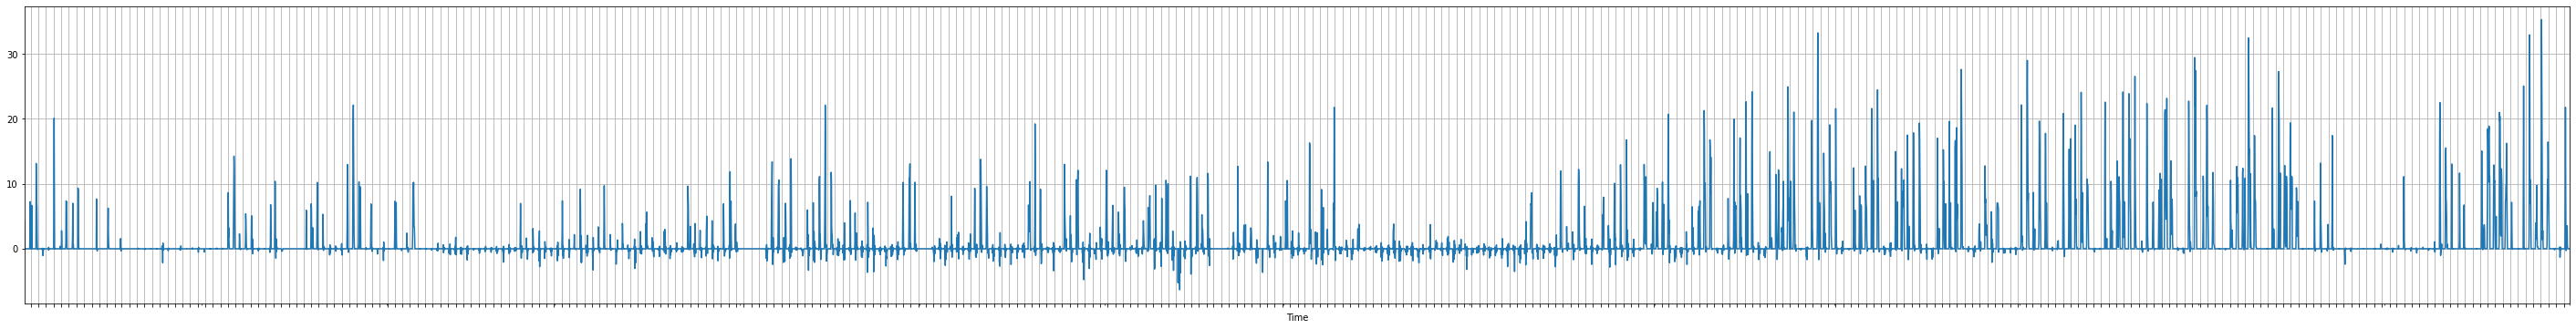

In [54]:
fig = Charge_hourly['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

In [55]:
Charge_hourly

,Energy_kWh
Time,
2020-12-02 09:00:00,4.214567
2020-12-02 10:00:00,0.560625
2020-12-02 11:00:00,-0.011950
2020-12-02 12:00:00,-0.005675
2020-12-02 13:00:00,0.000558
...,...
2022-01-31 20:00:00,0.000000
2022-01-31 21:00:00,0.000000
2022-01-31 22:00:00,0.000000


In [56]:
Charge_hourly['weekday']=Charge_hourly.index.day_of_week
Charge_hourly['hour']=Charge_hourly.index.hour

In [57]:
import holidays
Charge_hourly['hols'] = pd.Series(Charge_hourly.index).apply(lambda x: holidays.CountryHoliday('NL').get(x)).values

In [58]:
Charge_hourly['hols'].unique()

array([None, 'Eerste Kerstdag', 'Tweede Kerstdag', 'Nieuwjaarsdag',
       'Goede Vrijdag', 'Eerste paasdag', 'Tweede paasdag', 'Koningsdag',
       'Hemelvaart', 'Eerste Pinksterdag', 'Tweede Pinksterdag'],
      dtype=object)

In [59]:
# Add HAN breaks
# https://www.hanuniversity.com/en/study-and-living/studying-at-han/academic-calendar/#
# https://schoolholidayseurope.eu/school-holidays-holland/
Charge_hourly.loc[(Charge_hourly.index > '2021-02-14 23:00:00') & (Charge_hourly.index < '2021-02-22 00:00:00'), 'hols'] = 'Spring holiday'
Charge_hourly.loc[(Charge_hourly.index > '2021-05-02 23:00:00') & (Charge_hourly.index < '2021-05-10 00:00:00'), 'hols'] = 'May holiday'
Charge_hourly.loc[(Charge_hourly.index > '2021-07-11 23:00:00') & (Charge_hourly.index < '2021-08-16 00:00:00'), 'hols'] = 'Summer break'
Charge_hourly.loc[(Charge_hourly.index > '2021-10-24 23:00:00') & (Charge_hourly.index < '2021-11-01 00:00:00'), 'hols'] = 'Fall holiday'
Charge_hourly.loc[(Charge_hourly.index > '2020-12-20 23:00:00') & (Charge_hourly.index < '2021-01-04 00:00:00'), 'hols'] = 'Winter break'
Charge_hourly.loc[(Charge_hourly.index > '2021-12-23 23:00:00') & (Charge_hourly.index < '2022-01-10 00:00:00'), 'hols'] = 'Winter break'

In [60]:
Charge_hourly

,Energy_kWh,weekday,hour,hols
Time,,,,
2020-12-02 09:00:00,4.214567,2,9,None
2020-12-02 10:00:00,0.560625,2,10,None
2020-12-02 11:00:00,-0.011950,2,11,None
2020-12-02 12:00:00,-0.005675,2,12,None
2020-12-02 13:00:00,0.000558,2,13,None
...,...,...,...,...
2022-01-31 20:00:00,0.000000,0,20,None
2022-01-31 21:00:00,0.000000,0,21,None
2022-01-31 22:00:00,0.000000,0,22,None


In [61]:
#Charge_hourly.to_csv('./charge_hourly.csv')

# Analyse data

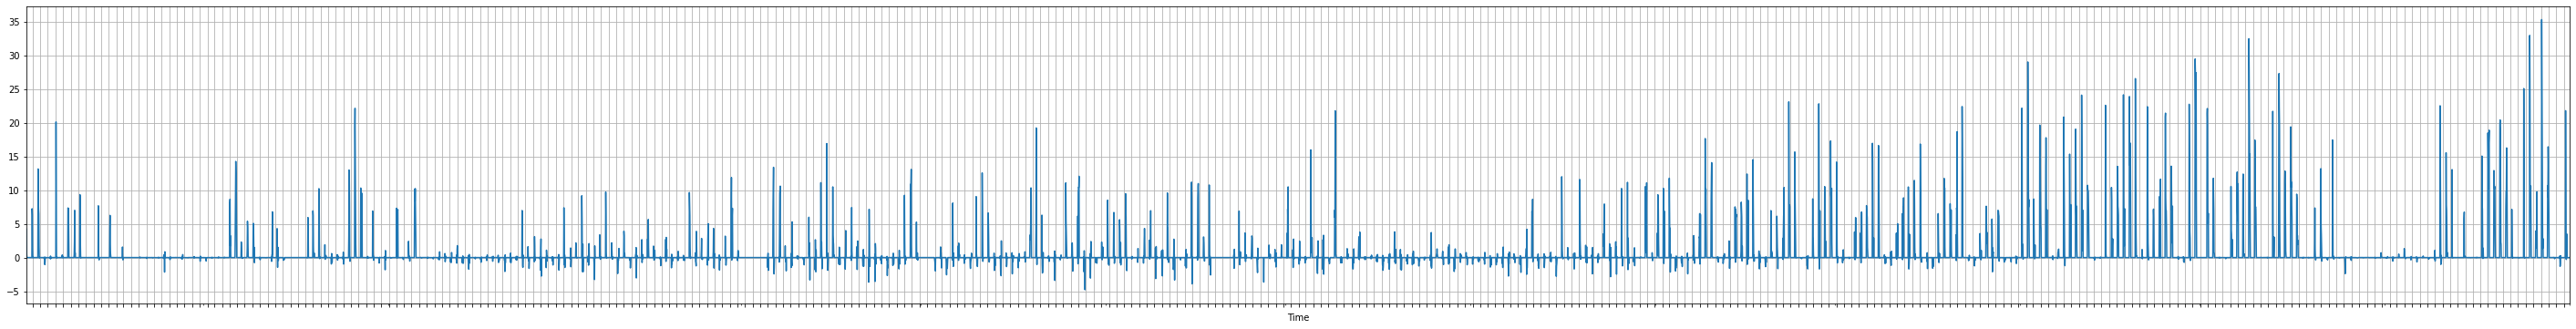

In [62]:
focus = Charge_hourly
focus['Energy_kWh'] = np.where((Charge_hourly.index.hour > 7) & (Charge_hourly.index.hour<14), Charge_hourly['Energy_kWh'], 0)
fig = focus['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

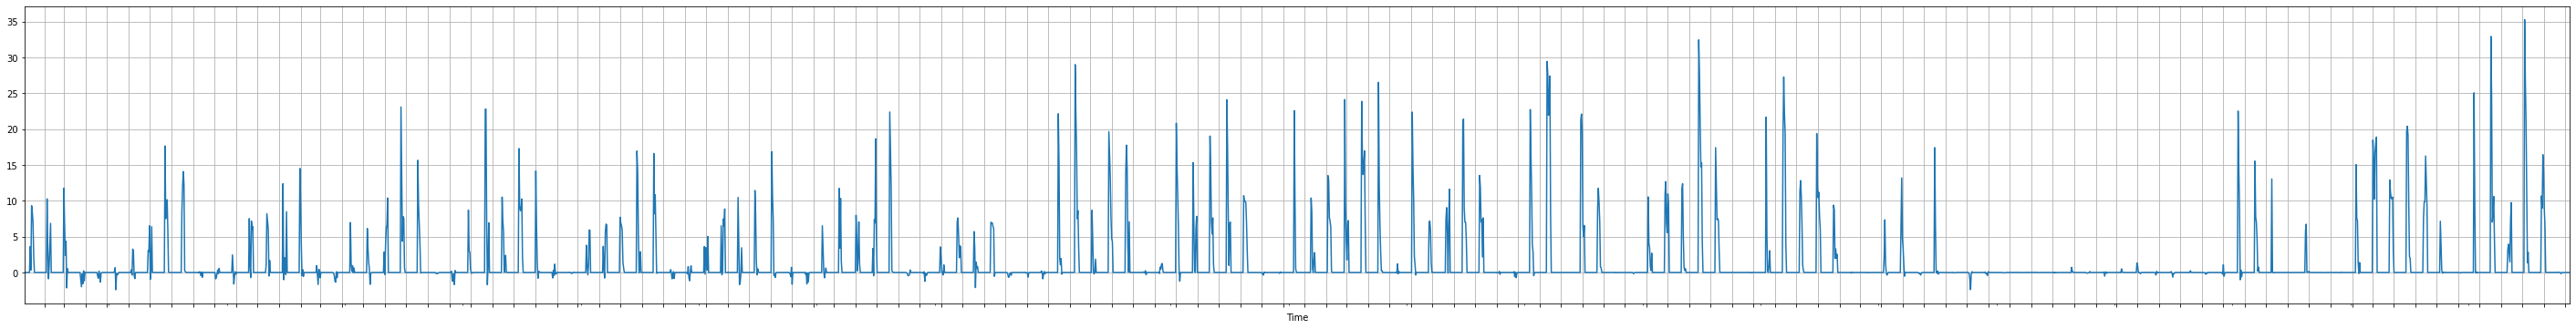

In [63]:
fig = focus.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

In [64]:
Charge_daily = Charge_hourly[['Energy_kWh']].groupby(pd.Grouper(freq='1D')).sum()

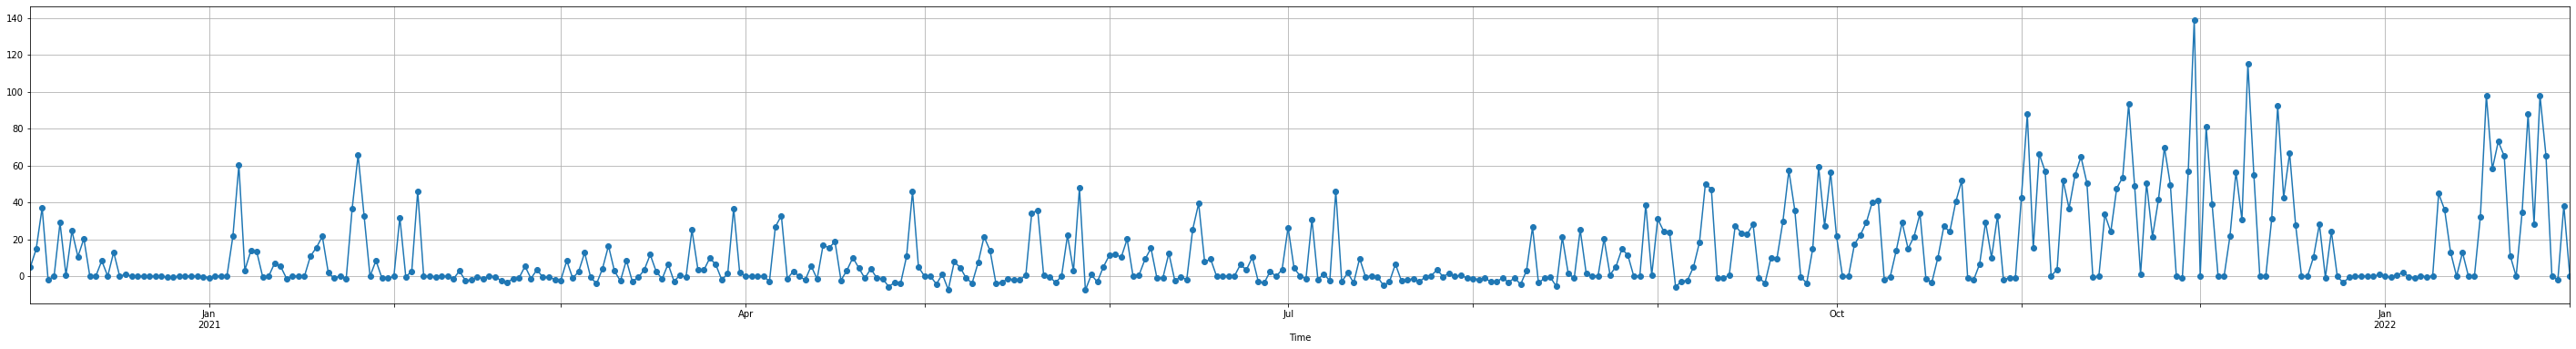

In [65]:
fig = Charge_daily['Energy_kWh'].plot(figsize=(50,6), marker='o')
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

The total charging demand is highest on Tuesday and Thursday, while the demand on a day is highest in early morning.

=> build a model based on this pattern

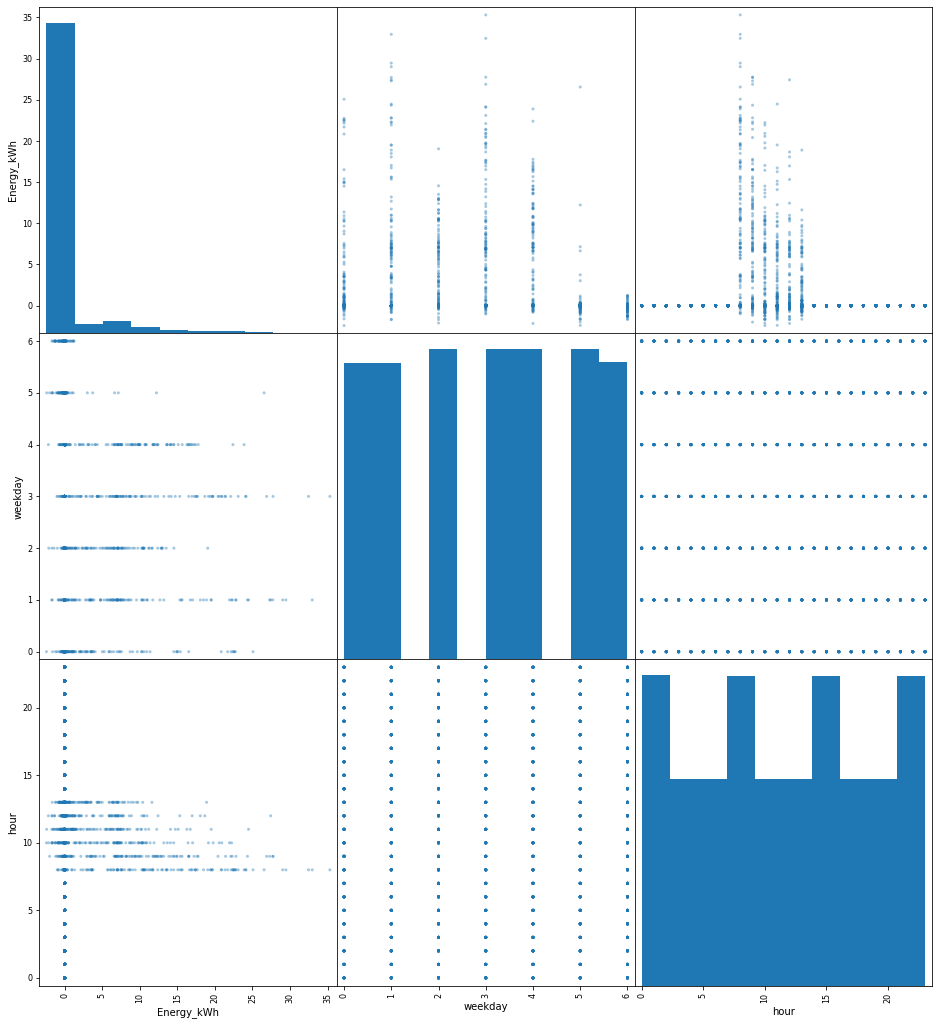

In [66]:
from pandas.plotting import scatter_matrix 
focus = Charge_hourly
focus['Energy_kWh'] = np.where((Charge_hourly.index.hour > 7) & (Charge_hourly.index.hour<14), Charge_hourly['Energy_kWh'], 0)
scatter_matrix(focus.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00',:], figsize=(16,18), alpha=0.4) 
plt.pyplot.show()

In [63]:
Charge_hourly_new = Charge_hourly[Charge_hourly.index > '2021-09-01 00:00:00']

In [64]:
Charge_hourly_new

,Energy_kWh,weekday,hour,hols
Time,,,,
2021-09-01 04:00:00,0.000000,2,4,None
2021-09-01 05:00:00,0.000000,2,5,None
2021-09-01 06:00:00,0.000000,2,6,None
2021-09-01 07:00:00,0.000000,2,7,None
2021-09-01 08:00:00,3.218242,2,8,None
...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,None
2022-01-31 22:00:00,0.000000,0,22,None
2022-01-31 23:00:00,0.000000,0,23,None


In [65]:
patMon = Charge_hourly_new[Charge_hourly_new.weekday == 0].groupby(['hour']).mean()
patMon.reset_index(inplace=True)
patTue = Charge_hourly_new[Charge_hourly_new.weekday == 1].groupby(['hour']).mean()
patTue.reset_index(inplace=True)
patWed = Charge_hourly_new[Charge_hourly_new.weekday == 2].groupby(['hour']).mean()
patWed.reset_index(inplace=True)
patThu = Charge_hourly_new[Charge_hourly_new.weekday == 3].groupby(['hour']).mean()
patThu.reset_index(inplace=True)
patFri = Charge_hourly_new[Charge_hourly_new.weekday == 4].groupby(['hour']).mean()
patFri.reset_index(inplace=True)
patSat = Charge_hourly_new[Charge_hourly_new.weekday == 5].groupby(['hour']).mean()
patSat.reset_index(inplace=True)
patSun = Charge_hourly_new[Charge_hourly_new.weekday == 6].groupby(['hour']).mean()
patSun.reset_index(inplace=True)

In [66]:
patWeek_Avg = pd.concat([patMon, patTue, patWed, patThu, patFri, patSat, patSun])
patWeek_Avg.reset_index(inplace=True)

In [67]:
patWeek_Avg.drop(['index'], axis=1, inplace=True)

<AxesSubplot:>

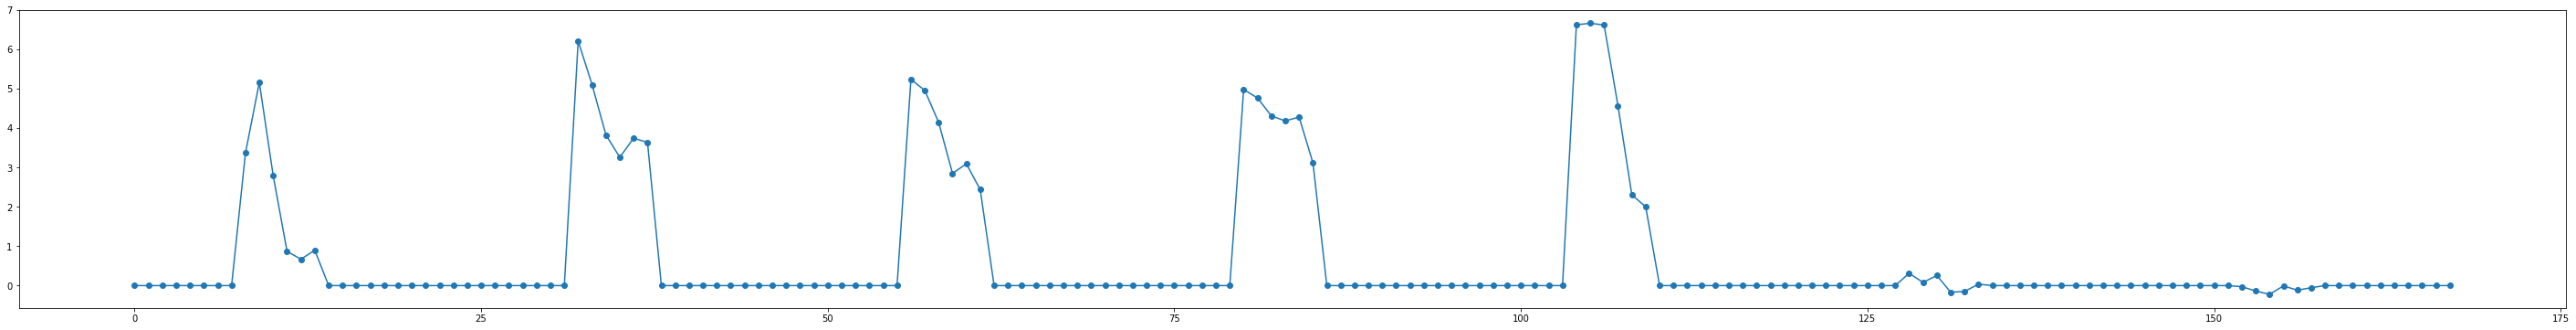

In [68]:
patWeek_Avg['Energy_kWh'].plot(figsize=(50,6), marker='o')

In [69]:
patWeek_Avg[(patWeek_Avg.weekday == 3) & (patWeek_Avg.hour == 9)]['Energy_kWh'].item()

4.7633897727272725

In [70]:
Charge_hourly_new['trend']=0
Charge_hourly_new

/tmp/ipykernel_35913/625284336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Charge_hourly_new['trend']=0


,Energy_kWh,weekday,hour,hols,trend
Time,,,,,
2021-09-01 04:00:00,0.000000,2,4,None,0
2021-09-01 05:00:00,0.000000,2,5,None,0
2021-09-01 06:00:00,0.000000,2,6,None,0
2021-09-01 07:00:00,0.000000,2,7,None,0
2021-09-01 08:00:00,3.218242,2,8,None,0
...,...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,None,0
2022-01-31 22:00:00,0.000000,0,22,None,0
2022-01-31 23:00:00,0.000000,0,23,None,0


In [71]:
Charge_hourly_Pred = Charge_hourly_new.copy()

for i in range(len(Charge_hourly_new)):
    day = Charge_hourly_new.iloc[i]['weekday']
    hour = Charge_hourly_new.iloc[i]['hour']
    prediction = patWeek_Avg[(patWeek_Avg.weekday == day) & (patWeek_Avg.hour == hour)]['Energy_kWh'].item()
    Charge_hourly_Pred.loc[Charge_hourly_new.index[i],'trend'] = prediction

<AxesSubplot:xlabel='Time'>

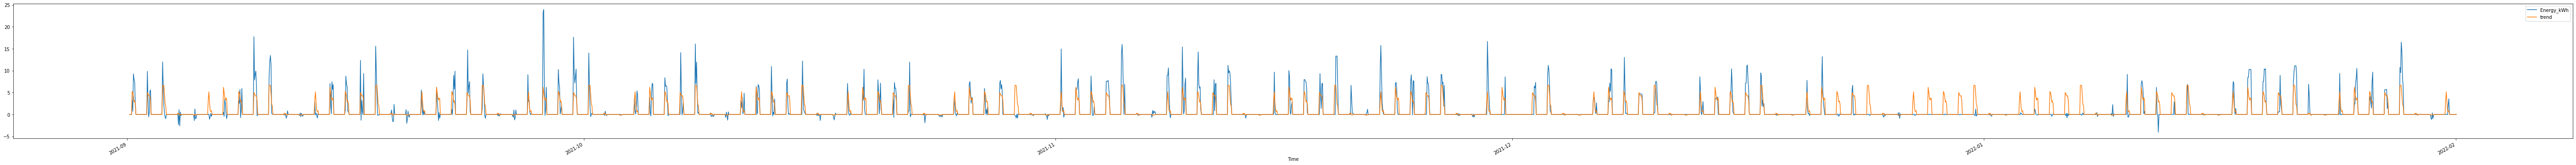

In [72]:
Charge_hourly_Pred.plot(y=['Energy_kWh', 'trend'], figsize=(100,6))

In [73]:
Charge_hourly_Pred.head(20)

,Energy_kWh,weekday,hour,hols,trend
Time,,,,,
2021-09-01 04:00:00,0.000000,2,4,None,0.000000
2021-09-01 05:00:00,0.000000,2,5,None,0.000000
2021-09-01 06:00:00,0.000000,2,6,None,0.000000
2021-09-01 07:00:00,0.000000,2,7,None,0.000000
2021-09-01 08:00:00,3.218242,2,8,None,5.235595
2021-09-01 09:00:00,0.710517,2,9,None,4.954581
2021-09-01 10:00:00,9.244908,2,10,None,4.144745
2021-09-01 11:00:00,8.028858,2,11,None,2.848656
2021-09-01 12:00:00,7.299417,2,12,None,3.091811


In [74]:
Charge_hourly_Pred['prediction']=0

In [75]:
for i in range(1, len(Charge_hourly_Pred)):
    diff = Charge_hourly_Pred.iloc[i-1]['Energy_kWh'] - Charge_hourly_Pred.iloc[i-1]['trend']
    Charge_hourly_Pred.loc[Charge_hourly_Pred.index[i],'prediction'] = Charge_hourly_Pred.loc[Charge_hourly_Pred.index[i],'trend'] + diff

In [76]:
Charge_hourly_Pred.head(20)

,Energy_kWh,weekday,hour,hols,trend,prediction
Time,,,,,,
2021-09-01 04:00:00,0.000000,2,4,None,0.000000,0.000000
2021-09-01 05:00:00,0.000000,2,5,None,0.000000,0.000000
2021-09-01 06:00:00,0.000000,2,6,None,0.000000,0.000000
2021-09-01 07:00:00,0.000000,2,7,None,0.000000,0.000000
2021-09-01 08:00:00,3.218242,2,8,None,5.235595,5.235595
2021-09-01 09:00:00,0.710517,2,9,None,4.954581,2.937228
2021-09-01 10:00:00,9.244908,2,10,None,4.144745,-0.099319
2021-09-01 11:00:00,8.028858,2,11,None,2.848656,7.948819
2021-09-01 12:00:00,7.299417,2,12,None,3.091811,8.272013


<AxesSubplot:xlabel='Time'>

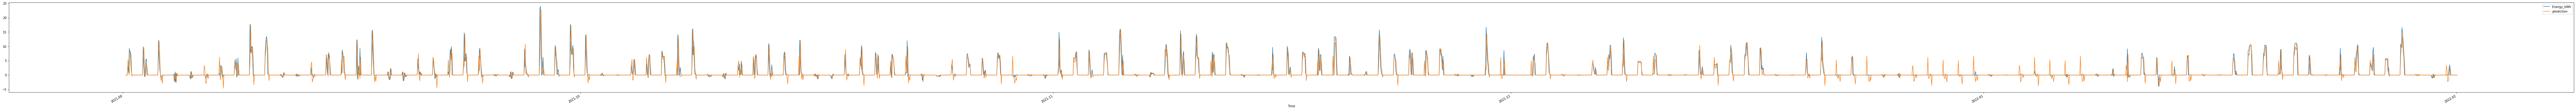

In [77]:
Charge_hourly_Pred.plot(y=['Energy_kWh', 'prediction'], figsize=(150,6))

In [78]:
Grid0322 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030122.csv')
PV0322 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030122.csv')

In [79]:
Grid0322_hourly = extract_data(Grid0322)
PV0322_hourly = extract_data(PV0322)

In [80]:
Grid0322_hourly

,Energy,Energy_kWh
Time,,
2022-02-01 05:00:00,0.0,0.000000
2022-02-01 06:00:00,-11991420.0,-3.330950
2022-02-01 07:00:00,-48314520.0,-13.420700
2022-02-01 08:00:00,-72918840.0,-20.255233
2022-02-01 09:00:00,-47977950.0,-13.327208
...,...,...
2022-02-28 21:00:00,0.0,0.000000
2022-02-28 22:00:00,0.0,0.000000
2022-02-28 23:00:00,0.0,0.000000


In [81]:
PV0322_hourly

,Energy,Energy_kWh
Time,,
2022-02-01 05:00:00,0.0,0.000000
2022-02-01 06:00:00,0.0,0.000000
2022-02-01 07:00:00,0.0,0.000000
2022-02-01 08:00:00,426240.0,0.118400
2022-02-01 09:00:00,1639170.0,0.455325
...,...,...
2022-02-28 20:00:00,0.0,0.000000
2022-02-28 21:00:00,0.0,0.000000
2022-02-28 22:00:00,0.0,0.000000


In [82]:
Grid0322 = Grid0322_hourly.iloc[:668,:]

In [83]:
Charge0322_hourly = Grid0322_hourly[['Energy_kWh']].copy()
Charge0322_hourly['Energy_kWh'] = PV0322_hourly['Energy_kWh'] - Grid0322_hourly['Energy_kWh']

<AxesSubplot:xlabel='Time'>

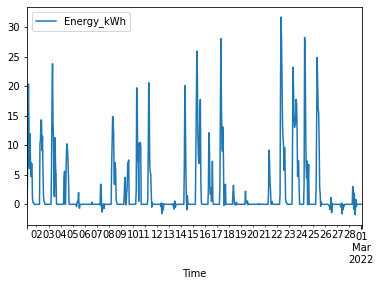

In [84]:
Charge0322_hourly.plot()

In [85]:
Charge0322_hourly['weekday']=Charge0322_hourly.index.day_of_week
Charge0322_hourly['hour']=Charge0322_hourly.index.hour

In [86]:
Charge0322_hourly

,Energy_kWh,weekday,hour
Time,,,
2022-02-01 05:00:00,0.000000,1,5
2022-02-01 06:00:00,3.330950,1,6
2022-02-01 07:00:00,13.420700,1,7
2022-02-01 08:00:00,20.373633,1,8
2022-02-01 09:00:00,13.782533,1,9
...,...,...,...
2022-02-28 21:00:00,0.000000,0,21
2022-02-28 22:00:00,0.000000,0,22
2022-02-28 23:00:00,0.000000,0,23


In [87]:
Charge0322_hourly_Pred = Charge0322_hourly.copy()

Charge0322_hourly_Pred['trend'] = 0

for i in range(len(Charge0322_hourly)):
    day = Charge0322_hourly_Pred.iloc[i]['weekday']
    hour = Charge0322_hourly_Pred.iloc[i]['hour']
    prediction = patWeek_Avg[(patWeek_Avg.weekday == day) & (patWeek_Avg.hour == hour)]['Energy_kWh'].item()
    Charge0322_hourly_Pred.loc[Charge0322_hourly_Pred.index[i],'trend'] = prediction

<AxesSubplot:xlabel='Time'>

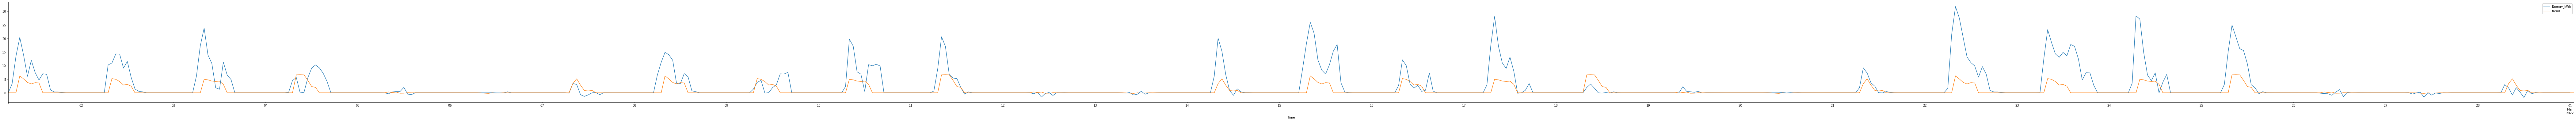

In [88]:
Charge0322_hourly_Pred.plot(y=['Energy_kWh', 'trend'], figsize=(150,6))

In [89]:
Charge0322_hourly_Pred['prediction']=0

In [90]:
for i in range(1, len(Charge0322_hourly_Pred)):
    diff = Charge0322_hourly_Pred.iloc[i-1]['Energy_kWh'] - Charge0322_hourly_Pred.iloc[i-1]['trend']
    Charge0322_hourly_Pred.loc[Charge0322_hourly_Pred.index[i],'prediction'] = Charge0322_hourly_Pred.loc[Charge0322_hourly_Pred.index[i],'trend'] + diff

<AxesSubplot:xlabel='Time'>

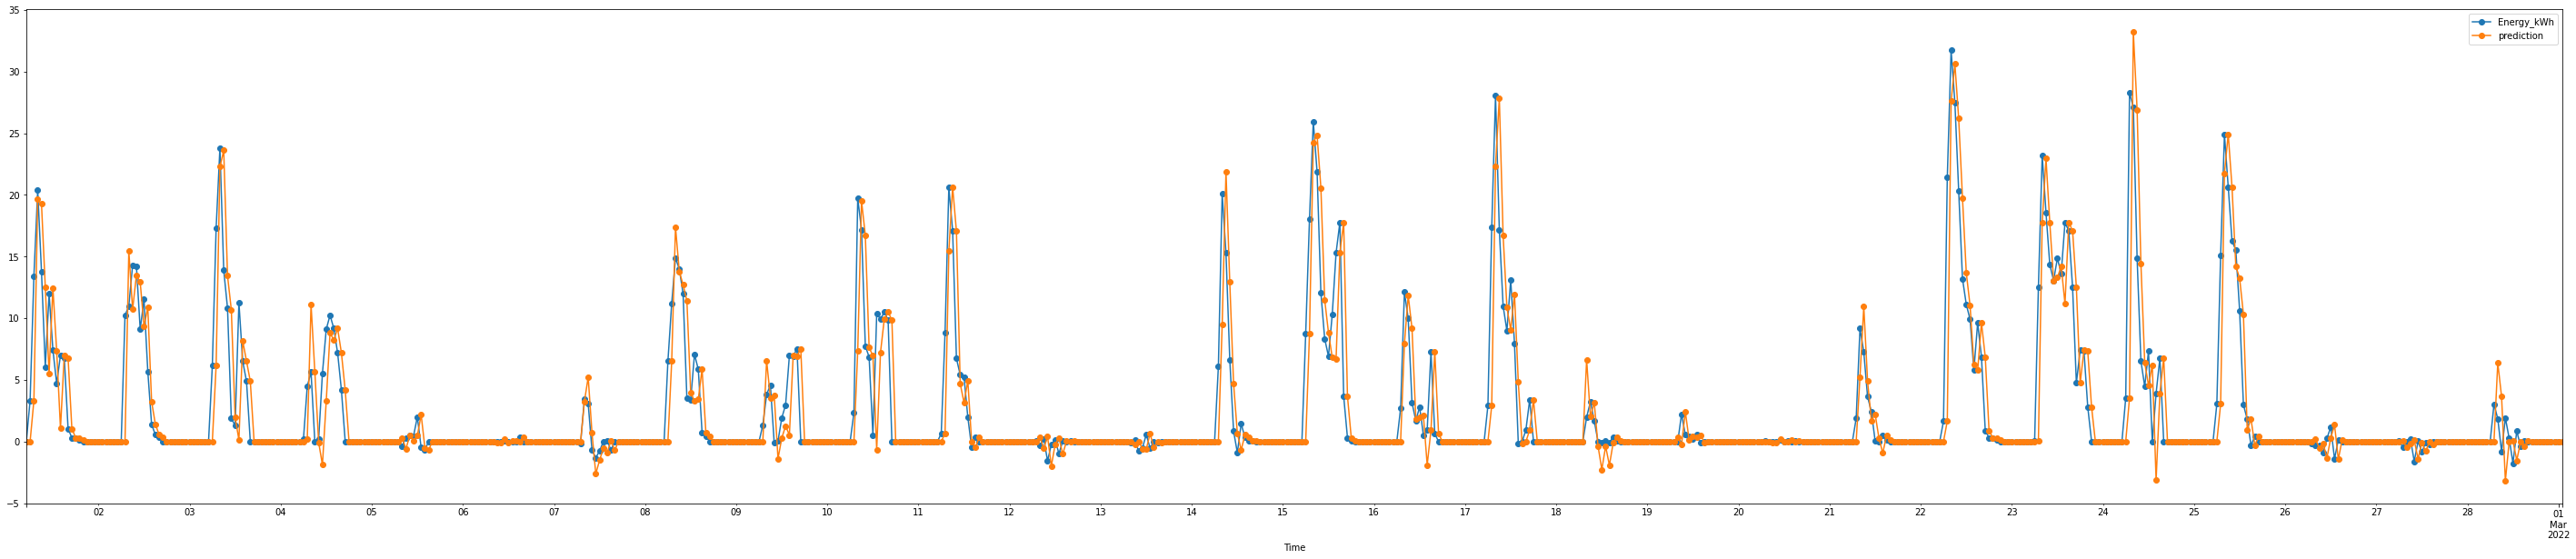

In [91]:
Charge0322_hourly_Pred.plot(y=['Energy_kWh', 'prediction'], figsize=(50,10), marker='o')

In [92]:
Charge0322_hourly_Pred['lag'] = Charge0322_hourly_Pred['Energy_kWh'].shift(periods=1)

<AxesSubplot:xlabel='Time'>

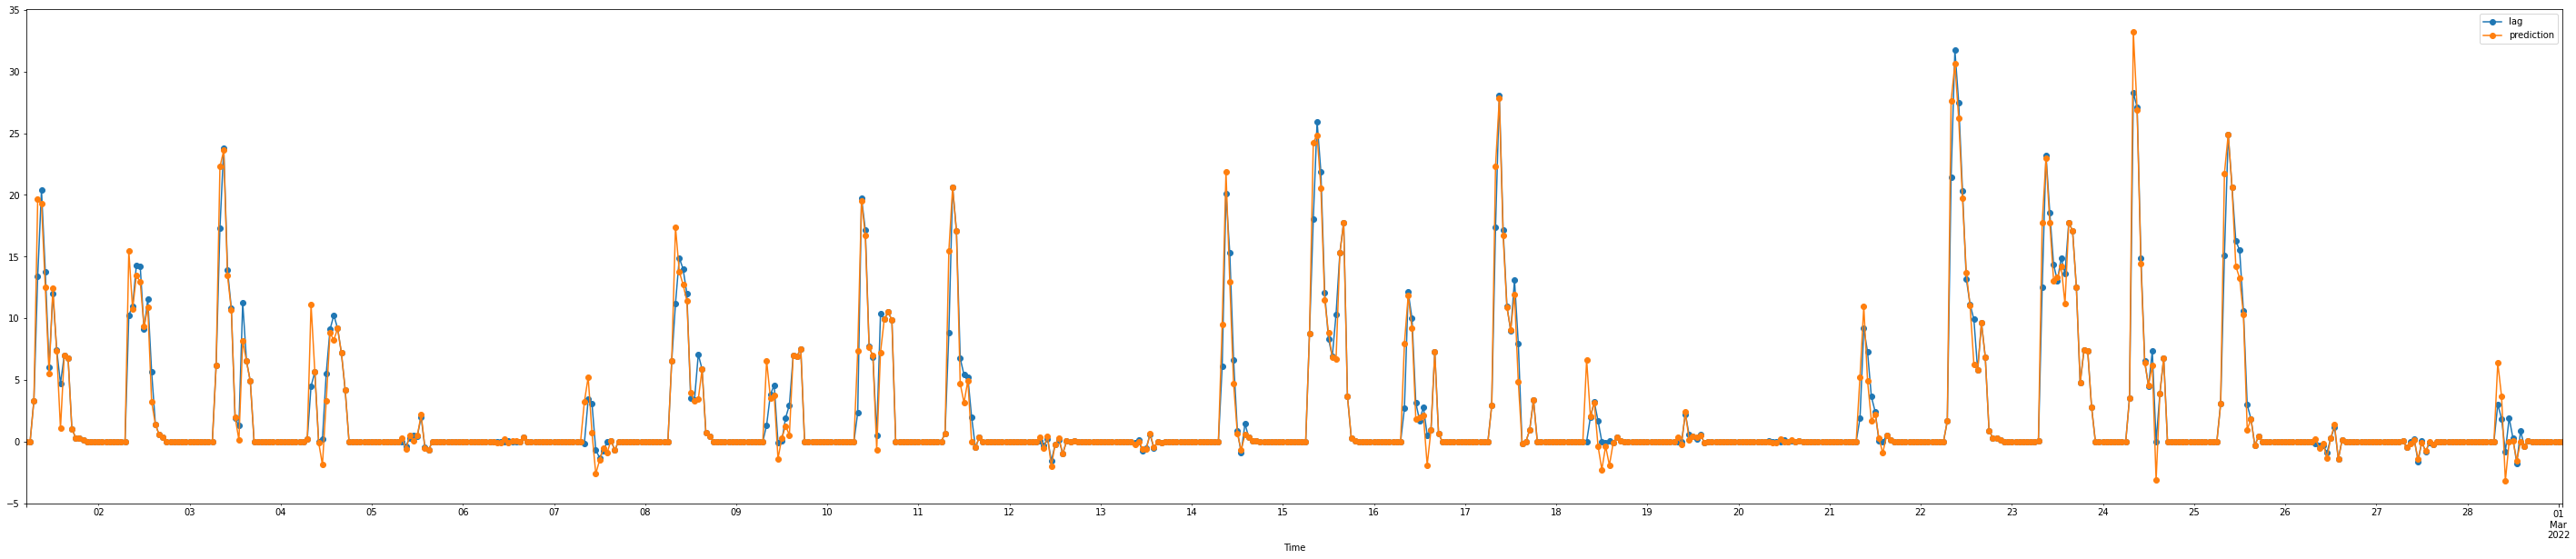

In [93]:
Charge0322_hourly_Pred.plot(y=['lag', 'prediction'], figsize=(50,10), marker='o')